<a href="https://colab.research.google.com/github/johnnycleiton07/image-processing/blob/main/CInUFPE_pdi02_Color_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2023.1 Especialização em Robótica: Processamento de Imagens**
# **Modelos de Cores**
> **Monitoria 02.1 - PDI01** - Macela Zovka de Moraes Lemos



**Objetivo ~~~**
Este notebook tem por objetivo exemplificar os conteúdos abordados na aula 02 de PDI relativos aos distintos Sistemas de Cores e algumas de suas aplicações.

# **Mudança de sistemas de cores com OpenCV**




OpenCV:

Ferramenta de manipulação e processamento de imagens utilizada para converter cores de um sistema para outro.

> APLICAÇÃO:
  - **Extração de objeto com base em cores esperadas**
  - **Seleção de imagens que possuem determinada cor predominante**.



## Função cv.cvtColor() na conversão entre sistemas de Cores

Assim como exibido no Notebook anterior, a função **cv.cvtColor()** é utilizada para converter imagens que quando importadas via **cv.imread** vêm no formato **BGR**:

>**imgRBG** = cv.cvtColor(img,code=cv.COLOR_**BGR2RGB**)

 >**imgHSV** = cv.cvtColor(img, cv.COLOR_**BGR2HSV**)


Ao todo, o opencv tem mais de 150 dessas flags.

## Modelo RGB
O padrão do OpenCv é o RGB, porém este armazena as cores em formato BGR. Por isso, às vezes, ao exibirmos uma imagem ela pode estar com cores não esperadas. Para corrigir isso, basta chamar a função cvtColor():

```
cv.cvtColor(frame, cv.COLOR_BGR2RGB)
```


O modelo RGB é aditivo e seus canais guardam respectivamente informações de intensidades das cores *vermelha, verde e azul*.

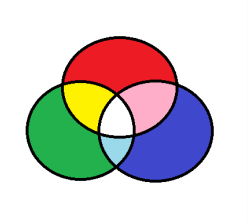

- Elementos **substrativos** de cores baseiam-se na absorção das cores, como é o caso de misturas de pigmento físicos palpáveis, com coloração, onde a refletância ocorre sobre as cores/frequências não absorvidas;
- Elementos **aditivos** se baseiam na geração/produção/emissão de cores, a soma ponderada das frequências luminosas resultam na cor branco.

###Ex: **Obtendo o Negativo de uma Imagem:**

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [2]:
#Autorizando GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


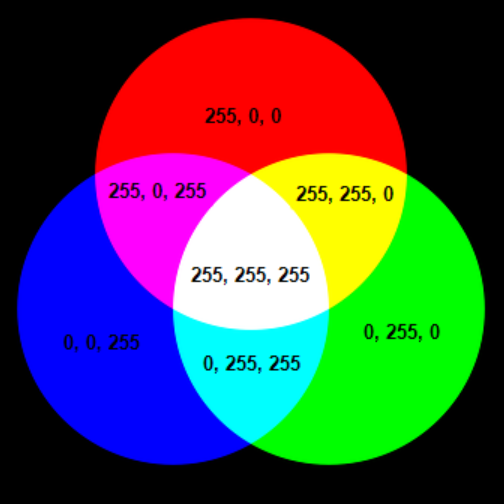

In [3]:
# Sistema RGB
path = '/content/drive/MyDrive/MONITORIA/Imagens/RGB-colors.png'
#path = '/content/drive/MyDrive/MONITORIA CIn/Imagens/RGB-colors.png'
img1 = cv.imread(path)
cv2_imshow(img1)

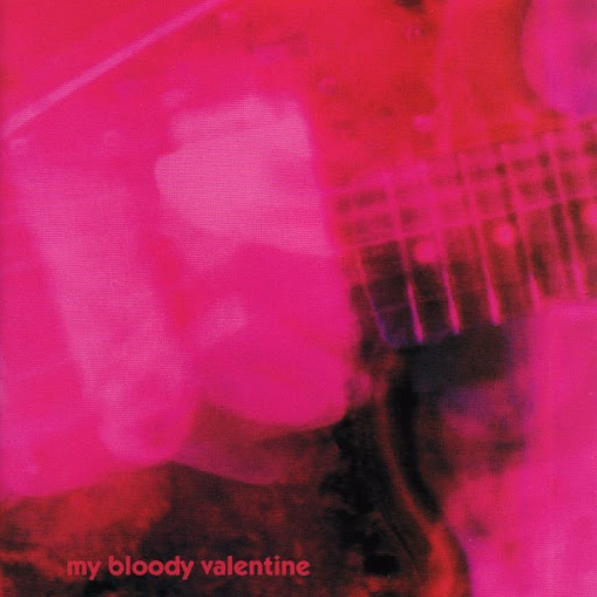

In [4]:
#Imagem ORIGINAL
path = '/content/drive/MyDrive/MONITORIA/Imagens/Loveless.png'
img2 = cv.imread(path)
cv2_imshow(img2)

**1 - Analise da cor exibida;**

**2 - O que seria o Negativo?**

**3 - Obtenção do Negativo;**

**4 - Plotagem.**


In [5]:
#Obtenção do Negativo
img_neg = 255 - img2

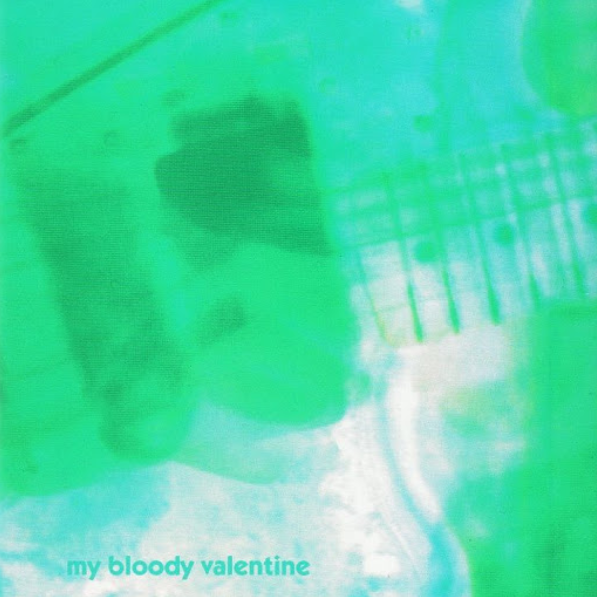

In [6]:
#PLOTAGEM
cv2_imshow(img_neg)

###RGB sobre o Cubo...

In [7]:
#Importando Bibliotecas a serem utilizadas
import numpy as np
import cv2 as cv
from IPython.display import Image, display
from google.colab.patches import cv2_imshow # for image display
from PIL import Image
import matplotlib.pyplot as plt

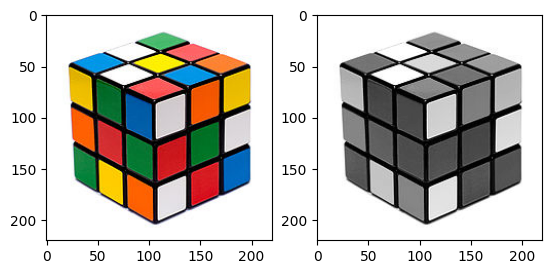

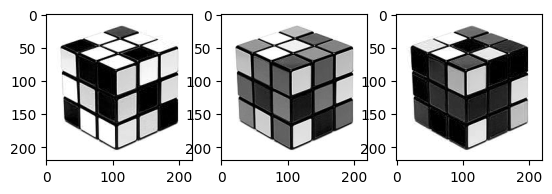

In [8]:
#Impotando via Drive
path = '/content/drive/MyDrive/MONITORIA/Imagens/Rubiks_cube.jpg'
#path = '/content/drive/MyDrive/MONITORIA CIn/Imagens/Rubiks_cube.jpg'

#BGR
cube = cv.imread(path)

# Convert BGR to GRAYSCALE
gray = cv.cvtColor(cube,code=cv.COLOR_BGR2GRAY)


# BGR -> RGB
cube_rgb  = cv.cvtColor(cube,code=cv.COLOR_BGR2RGB)

#
plt.subplot(1, 2, 1)
plt.imshow(cube_rgb)
plt.subplot(1, 2, 2)
plt.imshow(gray,cmap="gray")
plt.show()

# Visualizando os canais separadamente
R, G, B = cv.split(cube_rgb)

plt.subplot(1, 3, 1)
plt.imshow(R, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(G, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(B, cmap="gray")
plt.show()

## Modelo HSV



*   ***H**ue* (Matiz): especifica o ângulo da cor no círculo RGB. Uma matiz de 0° resulta em vermelho, 120° resulta em verde e 240° resulta em azul.
*   ***S**aturation* (Saturação): controla a quantidade de cor usada. Uma cor com saturação de 100% será a cor mais pura possível, enquanto a saturação de 0% resulta em tons de cinza.
*   ***V**alue* (Luminância): controla o brilho da cor. Uma cor com 0% de brilho é preto puro, enquanto uma cor com 100% de brilho não tem preto misturado à cor.

O modelo HSV tenta representar as cores percebidas pelo olho humano. O valor de matiz varia de 0-179, o valor para saturação e luminância variam de 0 a 255. É usado principalmente para segmentação de cores.


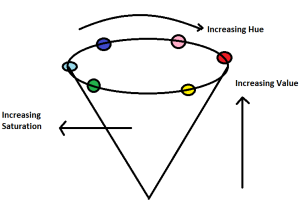

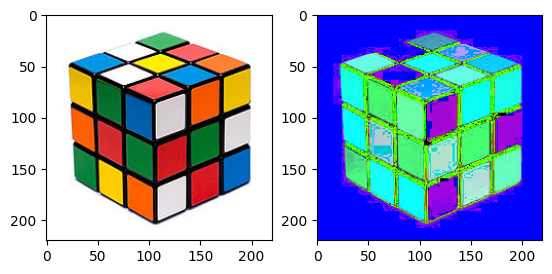

In [9]:
# Convert BGR to HSV
hsv = cv.cvtColor(cube, cv.COLOR_BGR2HSV)
# Dados mudam por pixel [Red->Matiz, Green->Saturação, Blues->Luminância]
plt.subplot(1, 2, 1)
plt.imshow(cube_rgb)
plt.subplot(1, 2, 2)
plt.imshow(hsv)
plt.show()

### HSV sobre o Nemo: exemplo de Extração de objeto

In [10]:
#Importando bibliotecas
#Tutorial: https://realpython.com/python-opencv-color-spaces/
import os
#import cv2
#import matplotlib.pyplot as plt
#import numpy as np

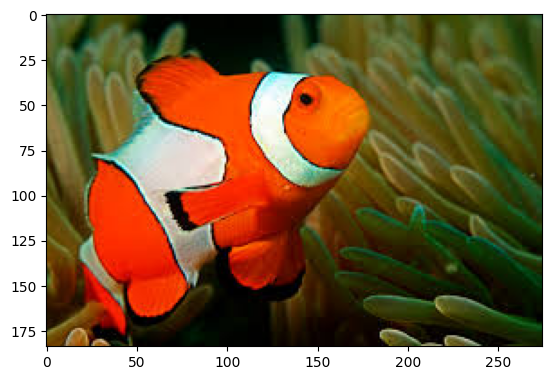

In [11]:
#CHAMANDO O NEMO
path = '/content/drive/MyDrive/MONITORIA/Imagens/nemo0.jpg'

#Nemo BGR
nemo = cv.imread(path)
#Nemo RGB
nemo = cv.cvtColor(nemo, cv.COLOR_BGR2RGB)

#Plot do Nemo no RGB
plt.imshow(nemo)
plt.show()

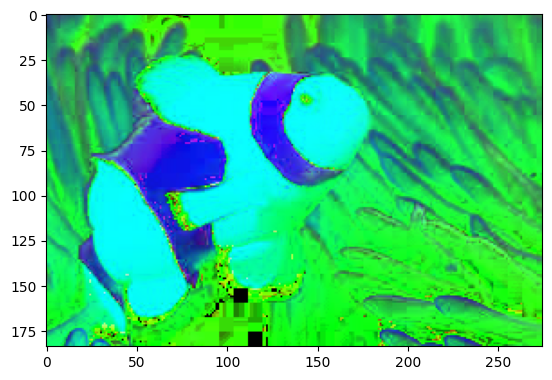

In [12]:
#Convertendo o Nemo para o HSV (Matiz, Saturação e Brilho)
hsv_nemo = cv.cvtColor(nemo, cv.COLOR_RGB2HSV)

#Plot do Nemo Full
plt.imshow(hsv_nemo)
plt.show()

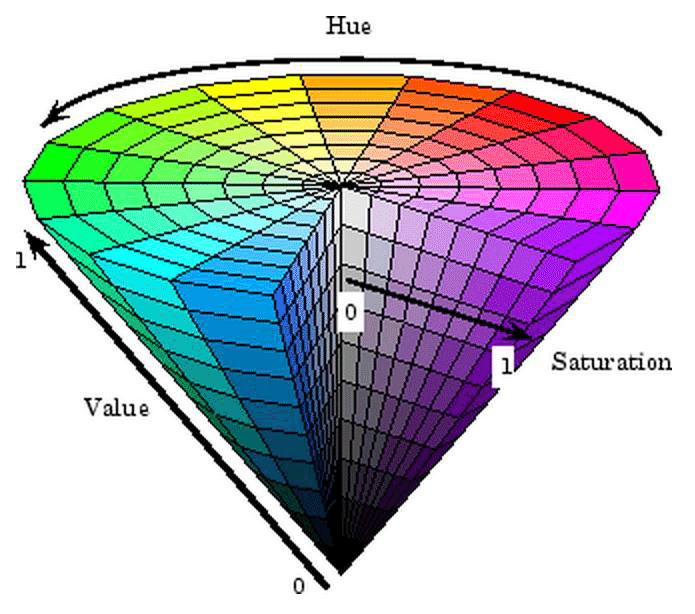

In [13]:
# PARÂMETROS DO HSV - Imagem ilustrativa para escolha de parâmetros
path = '/content/drive/MyDrive/MONITORIA/Imagens/HSV-colors.png'
img = cv.imread(path)
cv2_imshow(img)

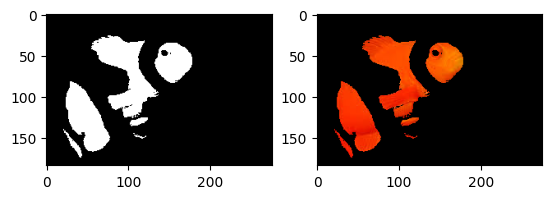

In [14]:
#Configurando intervalo/range de laranja a ser detectado:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

#Criando a máscara
mask = cv.inRange(hsv_nemo, light_orange, dark_orange)

#Gerando o Nemo
result = cv.bitwise_and(nemo, nemo, mask=mask)

#Exibindo a Mask e o resultado obtido sobre a imagem
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

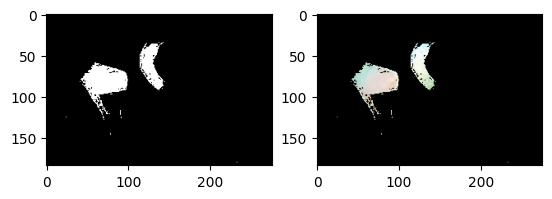

In [15]:
# Capturando as faixas brancas do nemo
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

#Setando a máscara
mask_white = cv.inRange(hsv_nemo, light_white, dark_white)
#Aplicando sobre o Nemo
result_white = cv.bitwise_and(nemo, nemo, mask=mask_white)

#Seção branca obtida em escala cinza e na imagem real
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

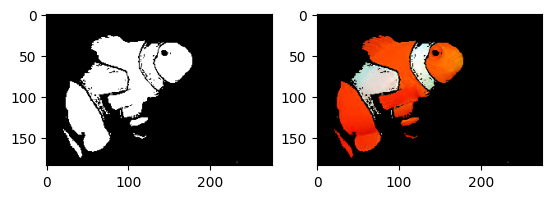

In [16]:
#UNINDO AS MÁSCARAS PARA GERAR NEMO: LARANJA E BRANCO
final_mask = mask + mask_white
final_result = cv.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

## Modelo HSL

*   **H**ue (Matiz):especifica o ângulo da cor no círculo de cores RGB, exatamente como HSV.
*   **S**aturation (Saturação): controla a pureza da cor.
*   **L**ightness (Brilho): controla a luminosidade da cor. Uma cor com 0% de brilho é preta, 50% é a cor mais pura possível e 100% é branca.

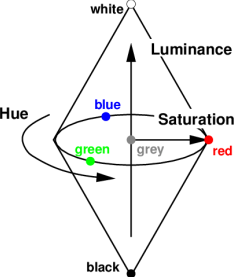

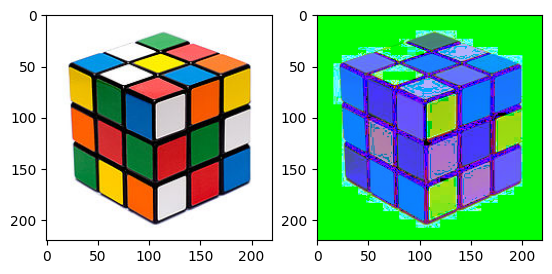

In [17]:
# Convert BGR to HSV
hsl = cv.cvtColor(cube, cv.COLOR_BGR2HLS)

plt.subplot(1, 2, 1)
plt.imshow(cube_rgb)
plt.subplot(1, 2, 2)
plt.imshow(hsl)
plt.show()

## Modelo CMYK

O modelo CMYK funciona


*   **C** - ciano
*   **M** - magenta
*   **Y** - amarelo
*   **K** - preto

Modelo subtrativo, ou seja, as cores são percebidas como resultado da luz refletida. Por exemplo, quando a luz incide sobre uma superfície ciano, o vermelho é absorvido (ou subtraído) enquanto as cores verde e azul são refletidas e, portanto, G+B=ciano. Da mesma forma ocorre para o magenta e amarelo. Uso: impressão de livros, revistas, etc.

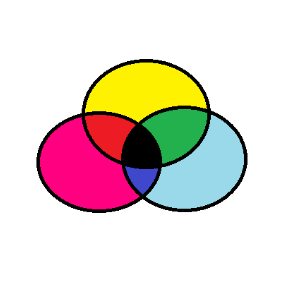

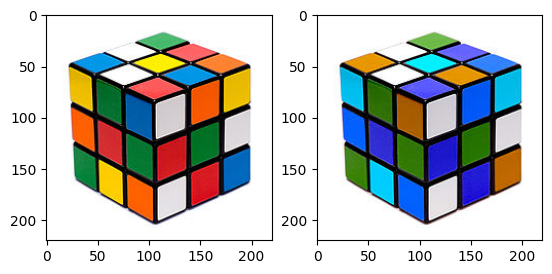

In [18]:
from PIL import Image

# Convert BGR to CMYK
cmyk_image = Image. fromarray(cube).convert('CMYK')


plt.subplot(1, 2, 1)
plt.imshow(cube_rgb)
plt.subplot(1, 2, 2)
plt.imshow(cmyk_image)
plt.show()

## Modelo CieLab



*   **L**ightness (Brilho):
*   **a** e **b** são coordenadas de cromaticidade.

O espaço de cores CIELab é o mais complexo e o mais robusto para comparações quantitativas. Foi definido pela *International Commission on Illumination (CIE)* com a intenção de ser um espaço de cores perceptualmente uniforme, o que significa que conjunto de cores separados pela mesma distância no espaço CIELab aparecerão igualmente diferentes. Os três canais do espaço de laboratório são Brilho(preto para branco), *a* (verde para vermelho) e *b* (azul para amarelo).

Uma das vantagens do CIELab é que ele é independente de dispositivo. As cores que ele define não são relativas a nenhum dispositivo específico, como um monitor ou uma impressora.

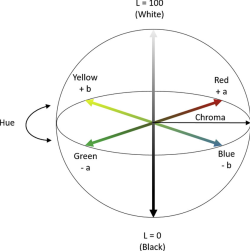

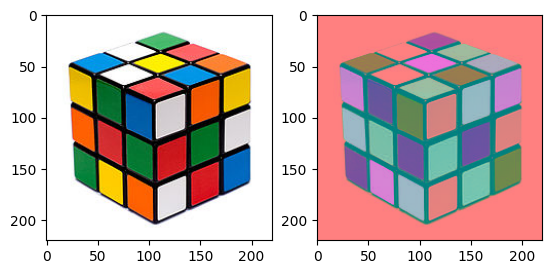

In [19]:
# Convert BGR to CieLab
cielab = cv.cvtColor(cube, cv.COLOR_BGR2Lab)

plt.subplot(1, 2, 1)
plt.imshow(cube_rgb)
plt.subplot(1, 2, 2)
plt.imshow(cielab)
plt.show()

#Para executar este Notebook:

- Adicione ao seu Drive as imagens [AQUI](https://drive.google.com/drive/folders/15FUG0Igsre7Vo6aABQocTJv90loAsbsR?usp=sharing) disponibilizadas;
- Edite os caminhos das Imagens para o seu diretório.

Este Notebook está diponível apenas para leitura. Para implementação e edição crie uma cópia (Arquivo -> Salvar uma cópia).

#Referências:

1- Image Processing Notebook [COLAB](https://colab.research.google.com/drive/1ha15-vy31XcuYXgiANDjTkptkPoEG98e#scrollTo=eeNtT7TxVq_5)

2- Sistema de Cor: [COLAB](https://colab.research.google.com/drive/1Z1zUfCKPqbNvnjnhrEdtaDL23i7vBac1?usp=sharing)